# **MID EXAM MODEL DEPLOYMENT**
**Nama : Marcelline Cathrine Wilison**  
**NIM : 2702210604**  
**Class : LE09**

## **CASE**

Anda adalah seorang *data scientist* dari suatu perusahaan dan diminta untuk membuat dan melakukan *deployment model machine learning* yang melakukan klasifikasi *booking status* dari *dataset B*.  
**LANGKAH 1**  
Buatlah model *machine learning* yang berisi proses *preprocessing machine learning, training*, dan hasil dari perbandingan 2 algoritma *machine learning*, yaitu *Random Forest* dan *XGBoost*. Ambil algoritma terbaik dan simpan dengan menggunakan *pickle*. Seluruh proses disimpan dengan *extension* **.ipynb**.  
**LANGKAH 2**  
Seluruh proses *training* dari algoritma *machine learning* yang terbaik diubah dalam format OOP.  
**LANGKAH 3**  
Membuat *code inference/prediction* untuk proses *deployment*.  
**LANGKAH 4**  
Lakukan proses *deployment* dengan menggunakan Streamlit dan berikan 2 *test case* pada Streamlit.  
**LANGKAH 5**  
Berikan penjelasan dari semua langkah-langkah yang telah anda kerjakan dalam sebuah video.

### **DATASET OVERVIEW**

- **Booking_ID**: Pengenal unik dari setiap pemesanan.
- **no_of_adults**: Jumlah orang dewasa.
- **no_of_children**: Jumlah anak kecil.
- **no_of_weekend_nights**: Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel.
- **no_of_week_nights**: Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel.
- **type_of_meal_plan**: Jenis paket makanan yang dipesan oleh pelanggan.
- **required_car_parking_space**: Apakah pelanggan membutuhkan tempat parkir mobil? [0: Tidak | 1: Ya]
- **room_type_reserved**: Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh INN Hotels.
- **lead_time**: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan.
- **arrival_year**: Tahun tanggal kedatangan.
- **arrival_month**: Bulan tanggal kedatangan.
- **arrival_date**: Tanggal kedatangan.
- **market_segment_type**: Penunjukkan segmen pasar.
- **repeated_guest**: Apakah pelanggan tersebut merupakan tamu yang pernah melakukan *booking* dan juga meginap? [0: Tidak | 1: Ya]
- **no_of_previous_cancellations**: Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini.
- **no_of_previous_bookings_not_canceled**: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini.
- **avg_price_per_room**: Harga rata-rata per hari pemesanan: harga kamar bersifat dinamis. (dalam Euro)
- **no_of_special_requests**: Jumlah total permintaan khusus yang dibuat oleh pelanggan. (Contoh: lantai yang tinggi, pemandangan dari kamar, dan lainnya)
- **booking_status** (*target variable*): *Flag* yang menunjukkan apakah pemesanan dibatalkan atau tidak.

## **CASE 1 ANSWER**

### **LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore", 
                        category = FutureWarning)
print("Libraries imported.")

Libraries imported.


### **READ AND EXPLORE DATA**

In [2]:
data = pd.read_csv("Dataset_B_hotel.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  

> Berdasarkan *output* di atas, diketahui bahwa data telah terbaca dengan baik, yakni memiliki 36275 observasi, 18 fitur, dan 1 variabel target.  
> Kemudian, data memiliki beberapa *missing values* pada kolom **type_of_meal_plan**, **required_car_parking_space**, dan **avg_price_per_room** karena jumlah *non-null count*nya yang lebih sedikit dibandingkan dengan *observations* yang ada, sehingga hal ini perlu dicatat sebagai perhatian tambahan yang perlu dieksplorasi lebih lanjut untuk penanganannya pada bagian [**MISSING VALUES**](#MISSING-VALUES).

### **CARDINALITY CHECK**

In [4]:
def check_unique_values(data):
    cardinal = pd.DataFrame({
        "column name": data.columns.tolist(),
        "data type": [data[c].dtype for c in data.columns],
        "unique values": [data[c].nunique() for c in data.columns],
        "values": [(data[c].unique()) for c in data.columns]
    })
    
    print("Cardinality Check Result:")
    display(cardinal)

check_unique_values(data)

Cardinality Check Result:


,column name,data type,unique values,values
0,Booking_ID,object,36275,"[INN00001, INN00002, INN00003, INN00004, INN00..."
1,no_of_adults,int64,5,"[2, 1, 3, 0, 4]"
2,no_of_children,int64,6,"[0, 2, 1, 3, 10, 9]"
3,no_of_weekend_nights,int64,8,"[1, 2, 0, 4, 3, 6, 5, 7]"
4,no_of_week_nights,int64,18,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,..."
5,type_of_meal_plan,object,4,"[Meal Plan 1, Not Selected, Meal Plan 2, nan, ..."
6,required_car_parking_space,float64,2,"[0.0, nan, 1.0]"
7,room_type_reserved,object,7,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T..."
8,lead_time,int64,352,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ..."
9,arrival_year,int64,2,"[2017, 2018]"


> Berdasarkan *cardinality check* di atas, didapatkan *insight* berikut:
> - **Booking_ID** merupakan *identifier* atau kolom yang bersifat unik untuk setiap observasi, sehingga tidak akan relevan untuk proses *modelling* nantinya, karnea tidak memiliki nilai prediktif, malah hanya akan menimbulkan potensi munculnya bias, sehingga kolom ini perlu untuk di-*drop*.
> - Kolom **type_of_meal_plan**, **required_car_parking_space**, **room_type_reserved**, **market_segment_type**, **repeated_guest**, dan **booking_status** merupakan kolom *categorical*, karena jumlah *unique values*nya sangat kecil dibandingkan jumlah data, serta fitur-fitur ini merepresentasikan pembagian data secara kategoris berdasarkan *dataset overview* yang ada.

#### **DROP IDENTIFIER COLUMN**

In [5]:
data = data.drop(columns = ["Booking_ID"])
print("Identifier column dropped.")

Identifier column dropped.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     35368 non-null  object 
 5   required_car_parking_space            35005 non-null  float64
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

> *Identifier* telah di-*drop*, sehingga saya dapat lanjut ke eksplorasi selanjutnya.

#### **DIVIDE CATEGORICAL AND NUMERICAL COLUMNS**

In [7]:
num = []
cat = ["type_of_meal_plan", "required_car_parking_space", "room_type_reserved", "market_segment_type", "repeated_guest", "booking_status"]

for i in data.columns:
    if i not in cat:
        num.append(i)

print("Categorical columns:")
for i in cat:
    print(f"- {i}")
print("Numerical columns:")
for i in num:
    print(f"- {i}")

Categorical columns:
- type_of_meal_plan
- required_car_parking_space
- room_type_reserved
- market_segment_type
- repeated_guest
- booking_status
Numerical columns:
- no_of_adults
- no_of_children
- no_of_weekend_nights
- no_of_week_nights
- lead_time
- arrival_year
- arrival_month
- arrival_date
- no_of_previous_cancellations
- no_of_previous_bookings_not_canceled
- avg_price_per_room
- no_of_special_requests


> Pada *code* ini, saya membagi kolom yang ada ke *categorical* dan *numerical columns* untuk mempermudah eksplorasi lebih lanjut.

### **IDENTIFY INCONSISTENCIES**

In [8]:
for c in cat:
    print(data[c].value_counts(), "\n")

type_of_meal_plan
Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64 

required_car_parking_space
0.0    33910
1.0     1095
Name: count, dtype: int64 

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64 

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64 

repeated_guest
0    35345
1      930
Name: count, dtype: int64 

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64 



> Pada bagian ini, saya melakukan identifikasi apakah ada data-data yang tidak konsisten dari kolom-kolom *categorical*, dan tidak ditemukan adanya anomali, sehingga eksplorasi dapat dilanjutkan.

### **DUPLICATED VALUES**

In [9]:
print(f"There are {data.duplicated().sum()} duplicates.")

There are 9197 duplicates.


> Berdasarkan *output* di atas, diketahui bahwa data memiliki 9197 *duplicated value*, sehingga saya akan melakukan *dropping* pada data-data yang *duplicate* ini, karena dapat menimbulkan *redundancy data* dan mempengaruhi analisis atau performa model nantinya.

In [10]:
data = data.drop_duplicates().reset_index(drop = True)
print(f"Duplicates dropped.")
print(f"There are {data.duplicated().sum()} duplicates.")

Duplicates dropped.
There are 0 duplicates.


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27078 entries, 0 to 27077
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          27078 non-null  int64  
 1   no_of_children                        27078 non-null  int64  
 2   no_of_weekend_nights                  27078 non-null  int64  
 3   no_of_week_nights                     27078 non-null  int64  
 4   type_of_meal_plan                     26198 non-null  object 
 5   required_car_parking_space            25888 non-null  float64
 6   room_type_reserved                    27078 non-null  object 
 7   lead_time                             27078 non-null  int64  
 8   arrival_year                          27078 non-null  int64  
 9   arrival_month                         27078 non-null  int64  
 10  arrival_date                          27078 non-null  int64  
 11  market_segment_

> Sekarang, sudah tidak ada *duplicated value* di dalam data, dan tersisa 27078 observasi, sehingga eksplorasi dapat dilanjutkan.

### **MISSING VALUES**

In [12]:
def check_missing(data):
    missing = pd.DataFrame({
        "column name" : data.columns.tolist(),
        "missing values": data.isnull().sum().tolist(),
        "percentage": ((data.isnull().sum()) * 100 / len(data)).round(2).tolist()
    })

    print("Missing Values Check Result:")
    display(missing)

check_missing(data)

Missing Values Check Result:


,column name,missing values,percentage
0,no_of_adults,0,0.00
1,no_of_children,0,0.00
2,no_of_weekend_nights,0,0.00
3,no_of_week_nights,0,0.00
4,type_of_meal_plan,880,3.25
5,required_car_parking_space,1190,4.39
6,room_type_reserved,0,0.00
7,lead_time,0,0.00
8,arrival_year,0,0.00
9,arrival_month,0,0.00


> Berdasarkan hasil *missing values check* di atas, diperoleh *insight* sebagai berikut:
> - **type_of_meal_plan** memiliki 880 *missing values*, yang setara dengan 3.25% dari keseluruhan data.
> - **required_car_parking_space** memiliki 1190 *missing values*, yakni sekitar 4.39% dari total data.
> - **avg_price_per_room** memiliki 1517 *missing values*, yakni 5.6% dari keseluruhan data.

> Persentase *missing values* dari kolom-kolom ini terbilang kecil, yakni hanya sekitar 5% dari keseluruhan data yang ada, dan umumnya dapat dilakukan imputasi secara langsung tanpa analisa lanjutan.  
> Namun, saya tetap akan melakukan eksplorasi tambahan pada *missing values* ini, untuk mengidentifikasi apakah perlu dilakukan imputasi atau adakah spesifikasi yang perlu dilakukan dalam imputasi nantinya.

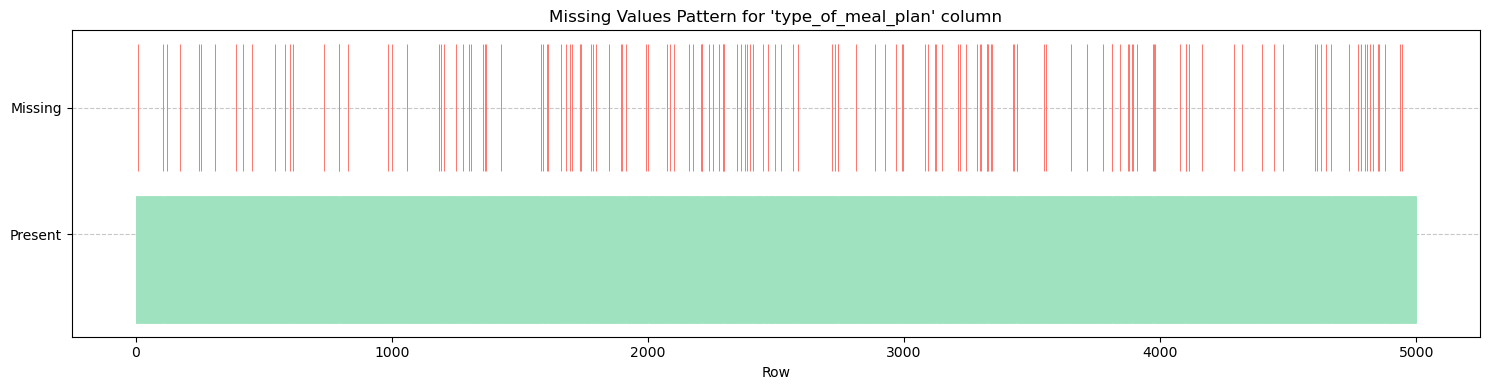

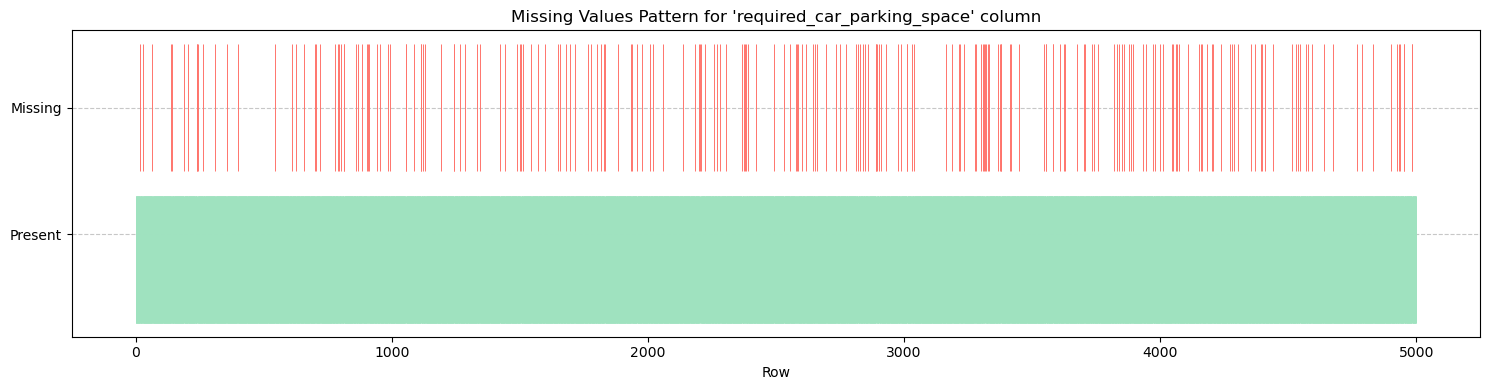

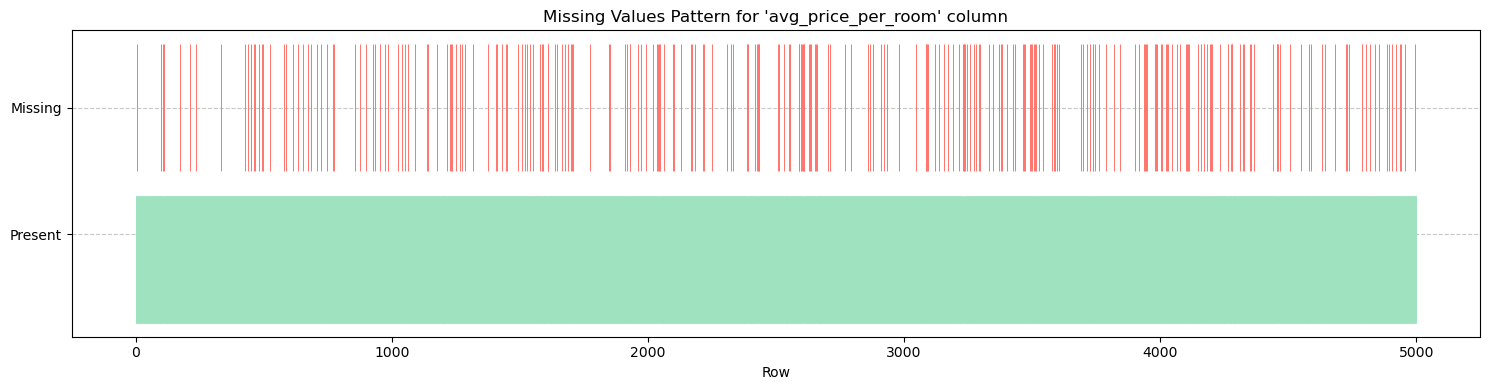

In [13]:
def na_pattern_plot(data, column, figsize = (15, 4)):
    na_mask = data[column].isna()
    fig, ax = plt.subplots(figsize = figsize)
    ax.vlines(data.index[na_mask], 
              ymin = 0.5, 
              ymax = 1.5, 
              linewidth = 0.7,
              colors = "#FF746C", 
              label = "Missing")
    ax.vlines(data.index[~na_mask],
              ymin = -0.7,
              ymax = 0.3,
              linewidth = 0.7,
              colors = "#9FE2BF",
              label = "Present")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Present", "Missing"])
    ax.set_xlabel("Row")
    ax.set_title(f"Missing Values Pattern for '{column}' column")
    ax.grid(True,
            axis = "y",
            linestyle = "--",
            alpha = 0.7)
    plt.tight_layout()
    plt.show()

for miss_cols in data.columns[data.isna().any()]:
    na_pattern_plot(data.iloc[:5000], 
                    miss_cols)

> Pada *code* di atas, saya melakukan *plotting* dengan melakukan *sampling* terhadap keseluruhan data, dikarenakan melakukan *plotting* kepada seluruh data akan menghasilkan bentuk *plot* yang terlalu *compact* dan sulit diinterpretasi.  
> Adapun dari hasil *plotting* yang ada, tidak ditemukan adanya pola khusus, karena *missing values* muncul secara acak tanpa terkonsentrasi di area tertentu.

In [14]:
def miss_vs_present(data):
    miss_cols = data.columns[data.isna().any()]

    for col in miss_cols:
        temp_data = data.\
                    groupby(data[col].isna())["booking_status"].\
                    apply(lambda x: (x == "Canceled").mean()).\
                    round(2).\
                    reset_index()
        temp_data[col] = temp_data[col].map({True: "Missing", False: "Present"})
        temp_data.rename(columns = {"booking_status": "% Canceled"}, 
                         inplace = True)
        display(temp_data)
    
    temp_df = data.copy()
    temp_df[miss_cols] = temp_df[miss_cols].isna().replace({True: "Missing", 
                                                            False: "Present"})
    summary = (
        temp_df.\
        groupby(list(miss_cols))["booking_status"].\
        value_counts().\
        unstack(fill_value = 0).\
        reset_index().\
        rename(columns = {"booking_status": "ID",
                          "Canceled": "Canceled Count",
                          "Not_Canceled": "Not_Canceled Count"})
    )
    summary["Total Count"] = summary["Canceled Count"] + summary["Not_Canceled Count"]
    summary["% Canceled"] = (summary["Canceled Count"] / summary["Total Count"]).round(2)

    display(summary)

miss_vs_present(data)

,type_of_meal_plan,% Canceled
0,Present,0.29
1,Missing,0.30


,required_car_parking_space,% Canceled
0,Present,0.29
1,Missing,0.31


,avg_price_per_room,% Canceled
0,Present,0.29
1,Missing,0.30


booking_status,type_of_meal_plan,required_car_parking_space,avg_price_per_room,Canceled Count,Not_Canceled Count,Total Count,% Canceled
0,Missing,Missing,Missing,1,5,6,0.17
1,Missing,Missing,Present,6,32,38,0.16
2,Missing,Present,Missing,10,26,36,0.28
3,Missing,Present,Present,251,549,800,0.31
4,Present,Missing,Missing,16,37,53,0.30
5,Present,Missing,Present,341,752,1093,0.31
6,Present,Present,Missing,431,991,1422,0.30
7,Present,Present,Present,6778,16852,23630,0.29


> Berdasarkan data di atas, diketahui bahwa tidak ada pola signifikan pada *missing values*, sehingga saya akan melakukan imputasi pada ketiga kolom ini dengan pendekatan berikut:
> - Modus: pada kolom **type_of_meal_plan** dan **required_car_parking_space**, karena kolom ini merupakan kolom *categorical*.
> - Median atau rata-rata: pada kolom **avg_price_per_room** dengan mengidentifikasi terlebih dahulu adanya *outlier* atau tidak pada kolom ini.

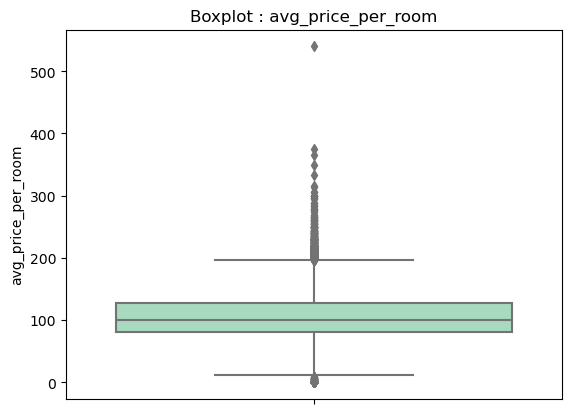

In [15]:
sns.boxplot(y = data["avg_price_per_room"],
            color = "#9FE2BF")
plt.title(f"Boxplot : avg_price_per_room")
plt.show()

> Karena kolom **avg_price_per_room** memiliki banyak *outlier*, maka saya akan melakukan imputasi dengan nilai median, untuk menghindari bias *imputation* akibat nilai-nilai yang ekstrem.

In [16]:
for miss_cols in data.columns[data.isna().any()]:
    if miss_cols in cat:
        data.loc[data[miss_cols].isna(), miss_cols] = data[miss_cols].dropna().mode().iloc[0]
    elif miss_cols in num:
        data.loc[data[miss_cols].isna(), miss_cols] = data[miss_cols].dropna().median()

check_missing(data)

Missing Values Check Result:


,column name,missing values,percentage
0,no_of_adults,0,0.0
1,no_of_children,0,0.0
2,no_of_weekend_nights,0,0.0
3,no_of_week_nights,0,0.0
4,type_of_meal_plan,0,0.0
5,required_car_parking_space,0,0.0
6,room_type_reserved,0,0.0
7,lead_time,0,0.0
8,arrival_year,0,0.0
9,arrival_month,0,0.0


> Berdasarkan *output* di atas, saya telah melakukan *handling* pada semua *missing values*, sehingga saya dapat lanjut ke eksplorasi selanjutnya.

### **DISTRIBUTION CHECK**

In [17]:
data[num].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000
mean,1.884519,0.136458,0.876209,2.254561,68.314794,2017.846776,7.344560,15.746658,0.027587,0.205037,105.173310,0.730408
std,0.527484,0.455048,0.885285,1.501785,70.644296,0.360210,3.135992,8.839151,0.400926,2.027470,36.653947,0.813203
min,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,12.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,81.700000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,45.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,99.900000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,102.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,125.100000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,2018.000000,12.000000,31.000000,13.000000,58.000000,540.000000,5.000000


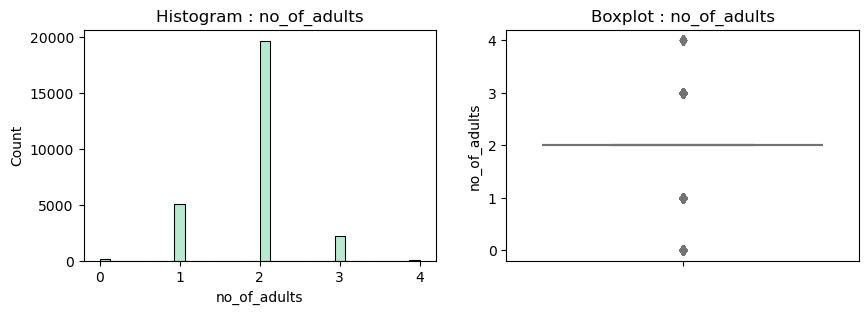

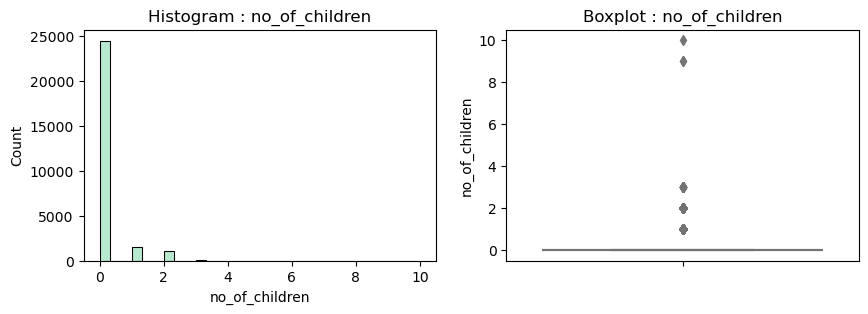

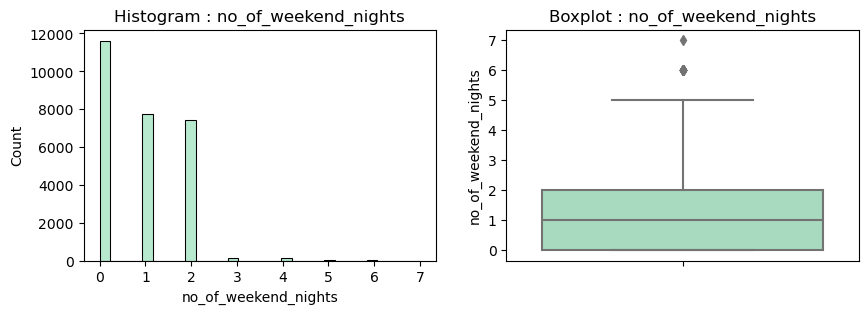

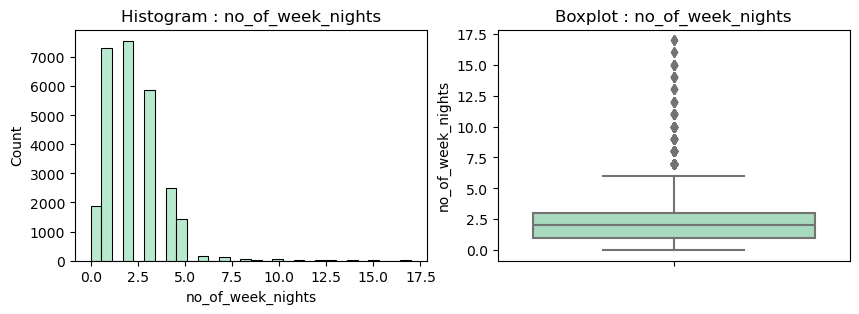

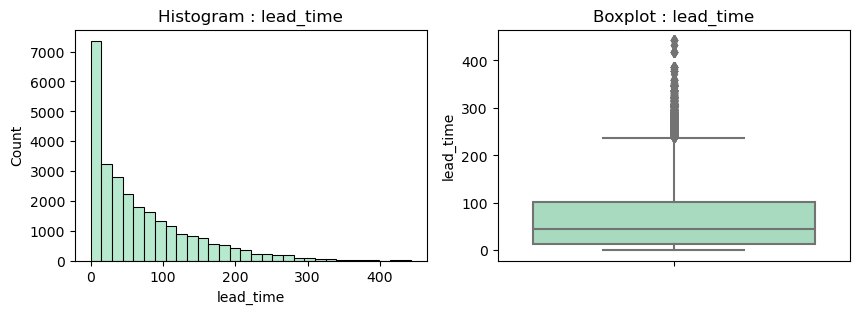

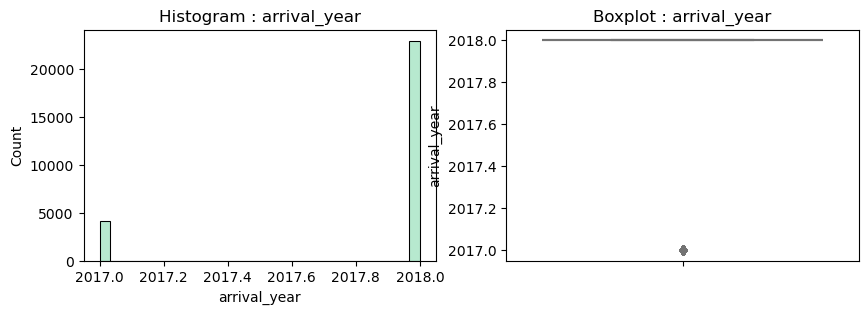

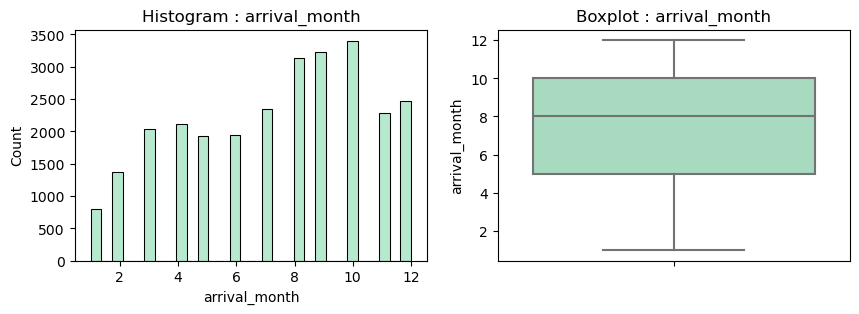

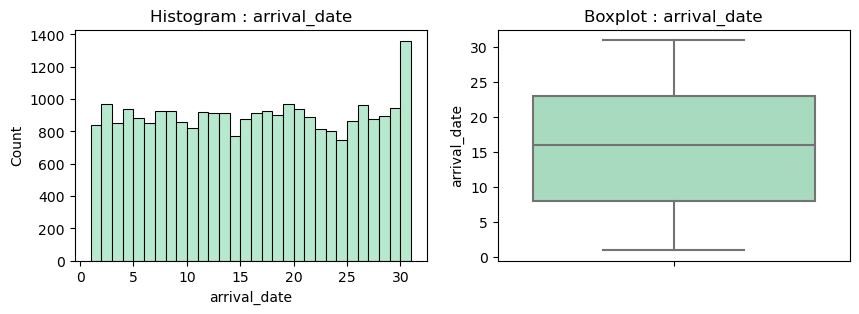

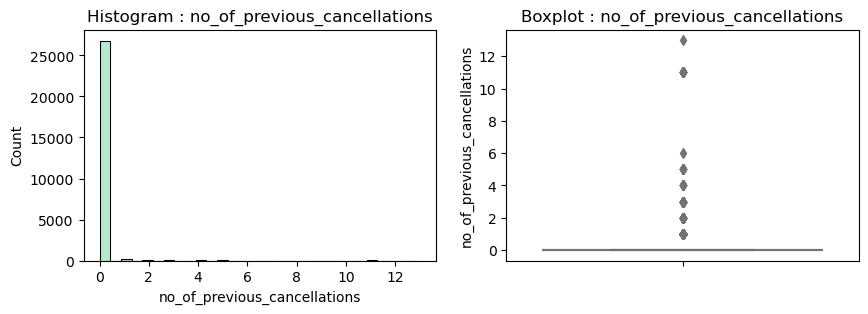

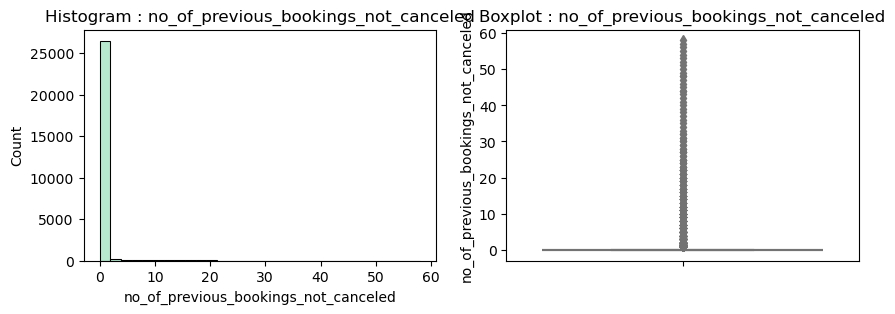

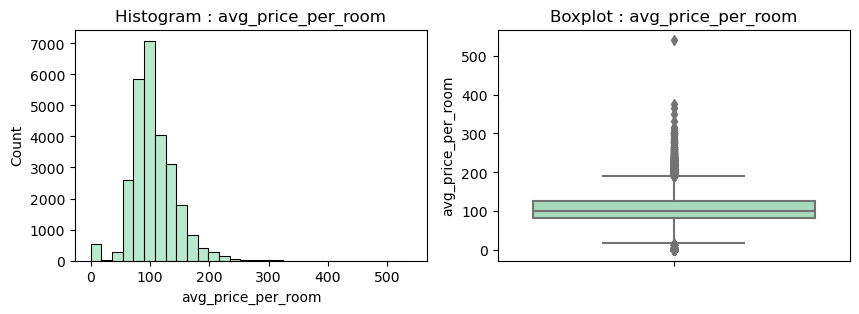

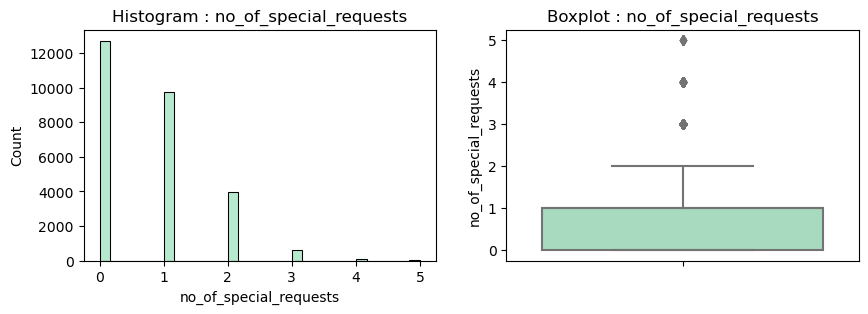

In [18]:
# Numerical Columns
def dist_check(df, columns):
    for c in columns:
        plt.figure(figsize = (10, 3))
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[c],
                     bins = 30,
                     color = "#9FE2BF")
        plt.title(f"Histogram : {c}")
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y = df[c],
                    color = "#9FE2BF")
        plt.title(f"Boxplot : {c}")
    
        plt.show()

dist_check(data, num)

> Berdasarkan *distribution check* pada kolom *numerical* di atas, diketahui bahwa rata-rata kolom memiliki *outlier*.  
> Namun, dikarenakan *outlier* yang ada bersifat *applicable* dan memungkinkan untuk ditemukan di dunia nyata, maka saya tidak akan melakukan *outlier handling*.  
> Sebagai tambahan analisa, karena hampir semua kolom memiliki *outlier* dan juga tidak terdistribusi secara normal, sehingga nantinya pada saat *scaling*, tidak baik untuk menggunakan *StandardScaler* maupun *MinMaxScaler*.

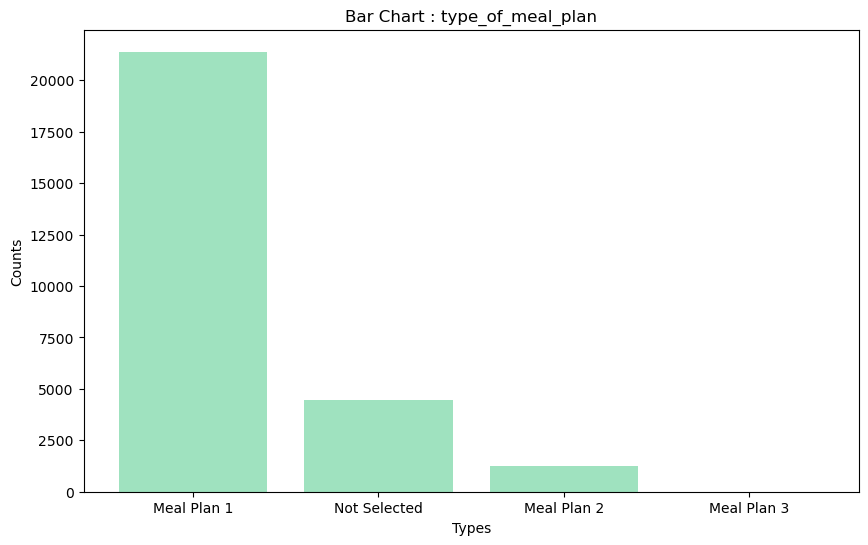

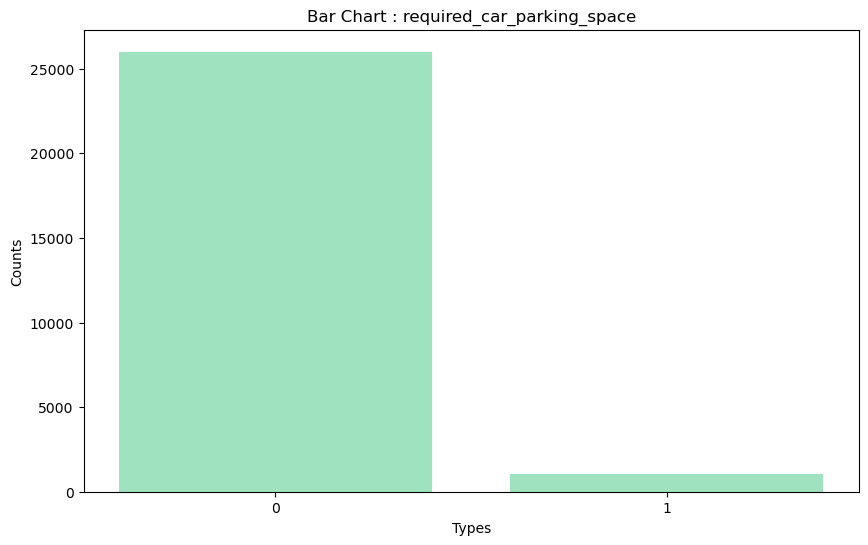

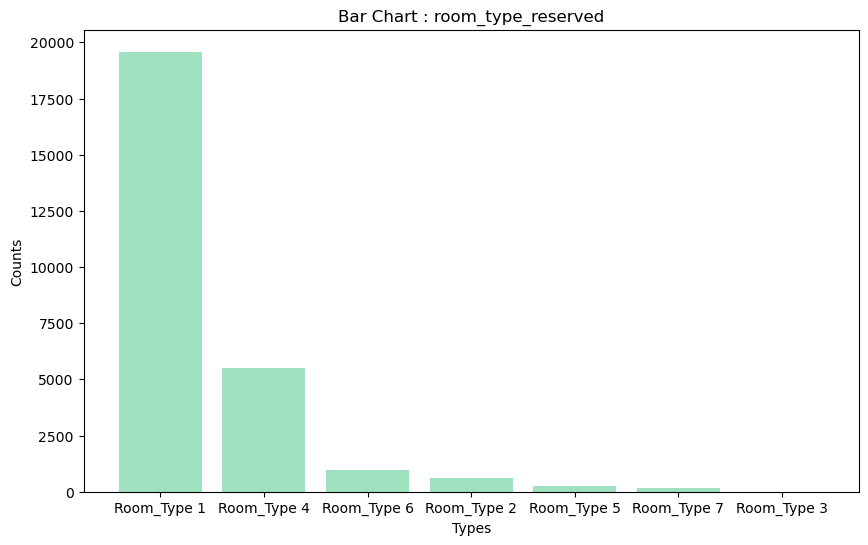

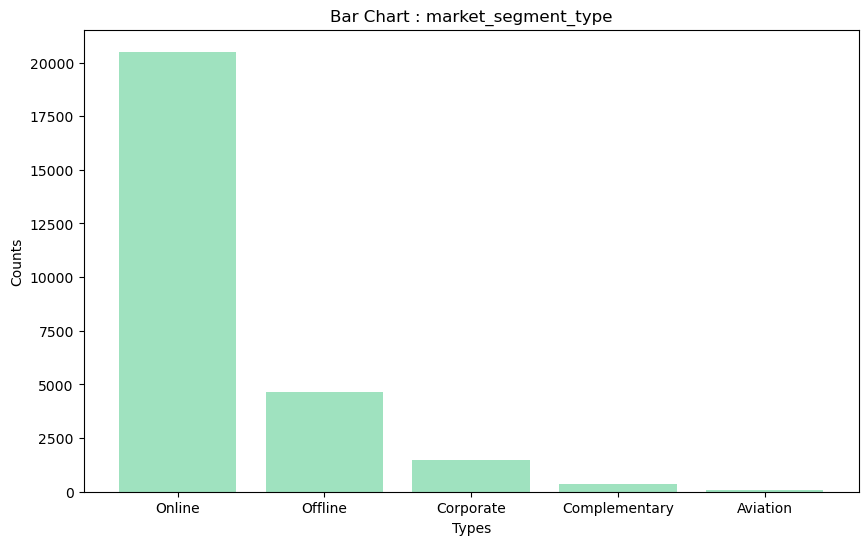

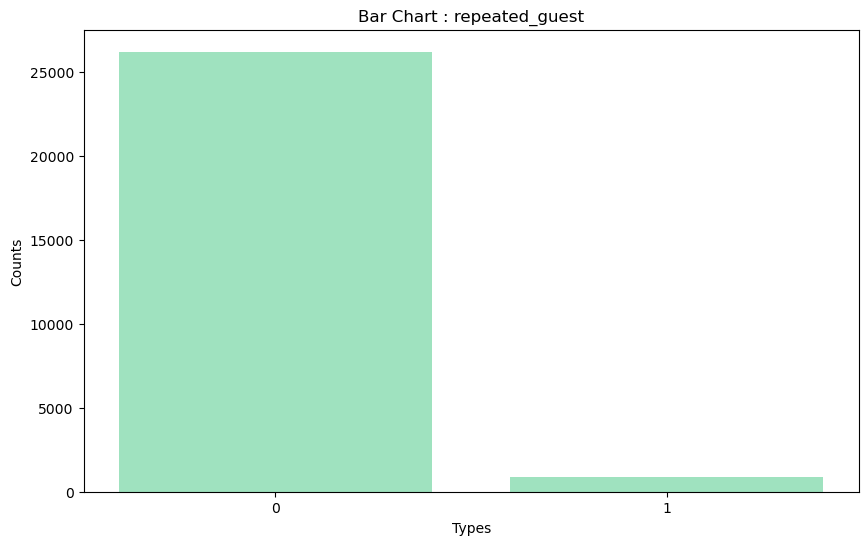

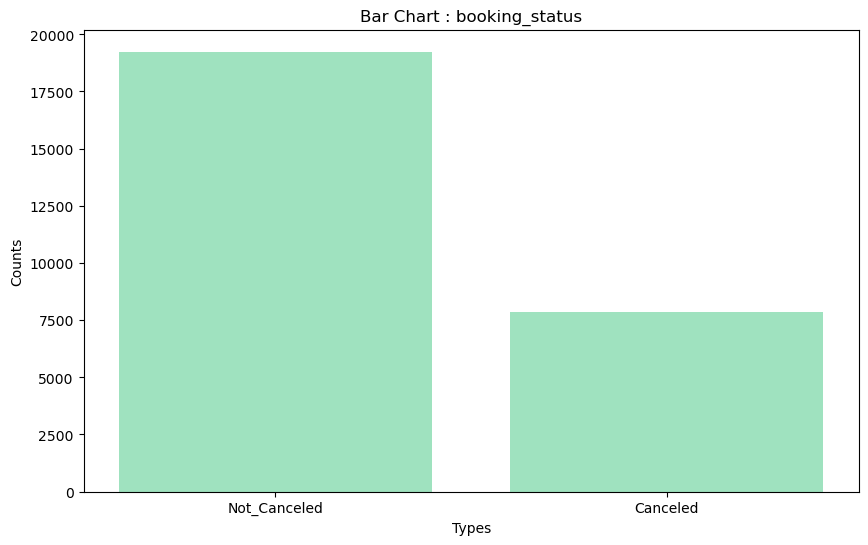

In [19]:
# Categorical Columns
def categorical_dist(df, columns):
    for c in columns:
        plt.figure(figsize = (10, 6))
    
        plt.bar(x = data[c].value_counts().index,
                height = data[c].value_counts().values,
                color = "#9FE2BF")
        plt.title(f"Bar Chart : {c}")
        plt.xlabel("Types")
        plt.ylabel("Counts")
        plt.xticks(data[c].value_counts().index)
    
        plt.show()

categorical_dist(data, cat)

> Berdasarkan *distribution check* pada kolom *categorical* di atas, didapatkan *insight* sebagai berikut:
> - **type_of_meal_plan**: Mayoritas *guest* memilih *Meal Plan 1* sebagai paket makanan yang mereka pilih saat menginap.
> - **required_car_parking_space**: Mayoritas *guest* tidak membutuhkan *parking space* saat menginap.
> - **room_type_reserved**: Tipe kamar yang paling sering dipilih oleh pengunjung adalah *Room Type 1*.
> - **market_segment_type**: *Market segment type* yang paling umum adalah melalui *online*.
> - **repeated_guest**: Hanya sedikit pengunjung yang kembali menginap di hotel.
> - **booking_status**: Kurang lebih 7500 pengunjung memutuskan untuk melakukan pembatalan *booking*.

### **CORRELATION CHECK**

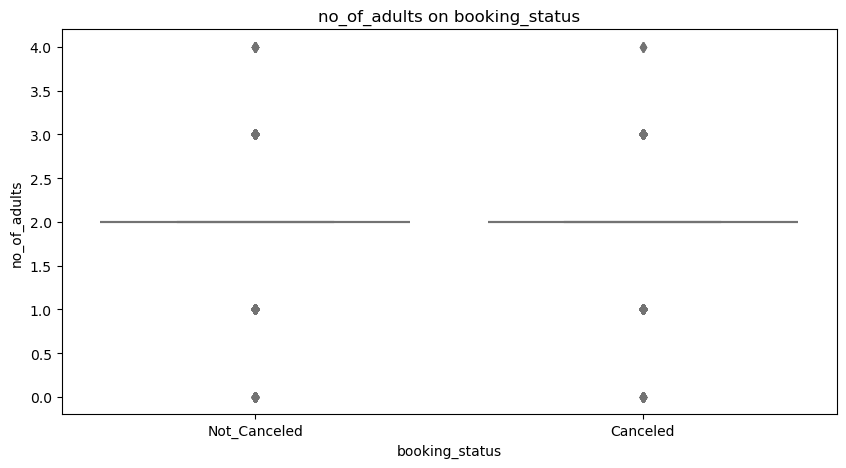

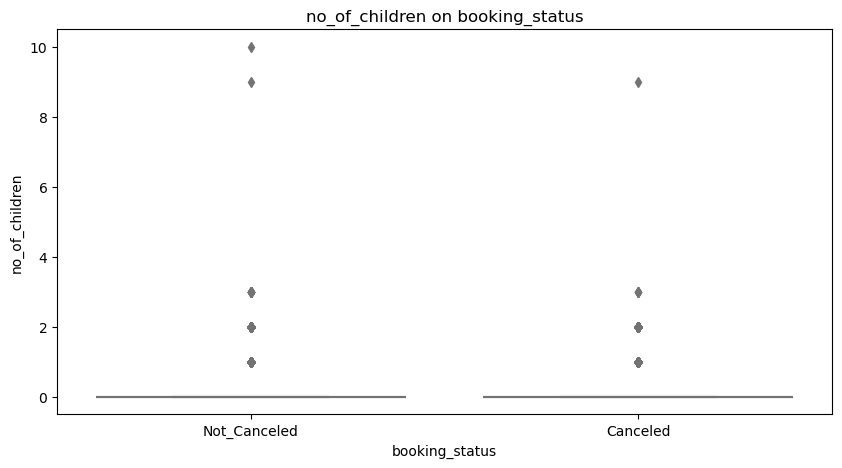

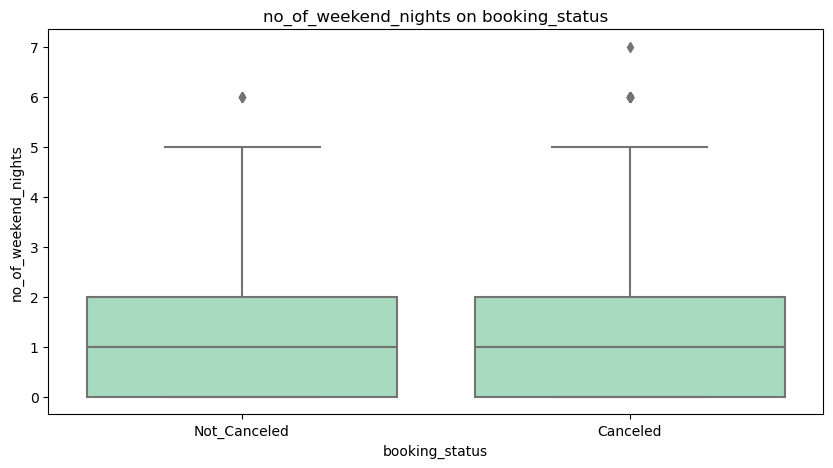

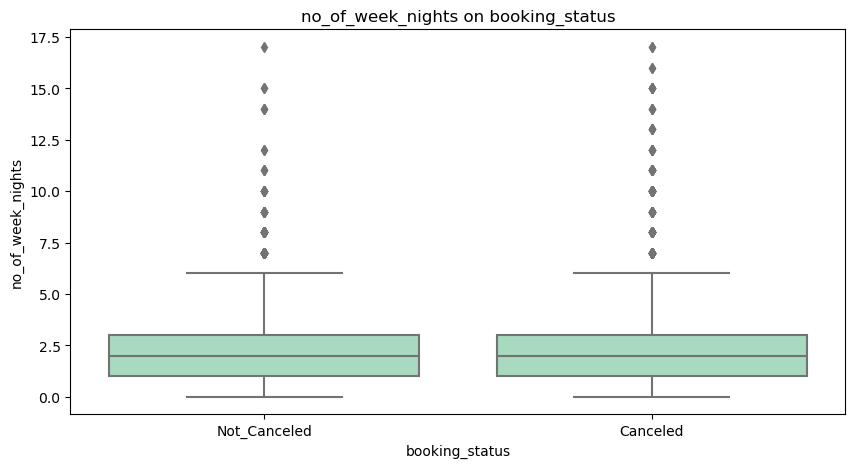

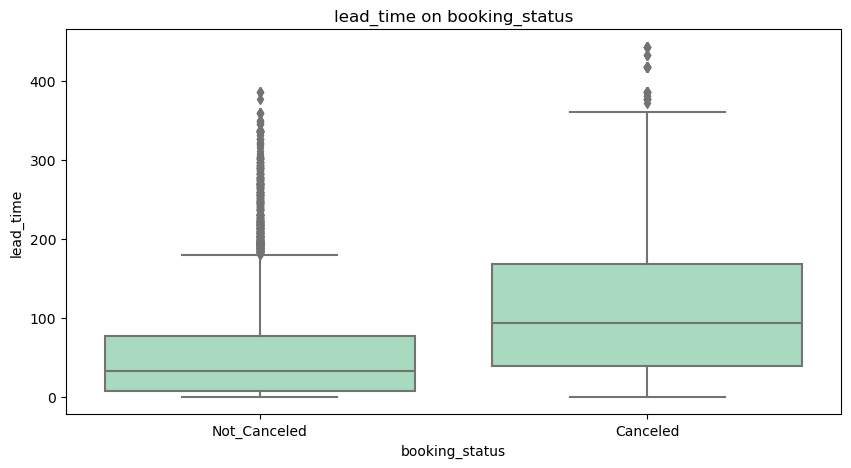

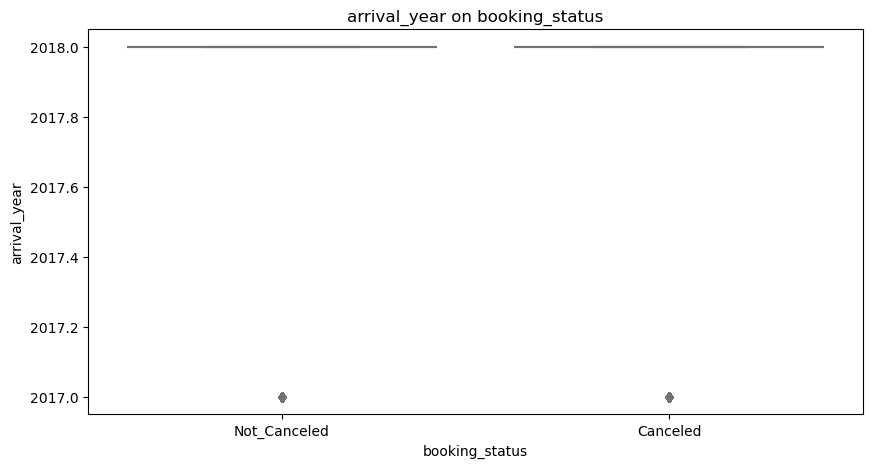

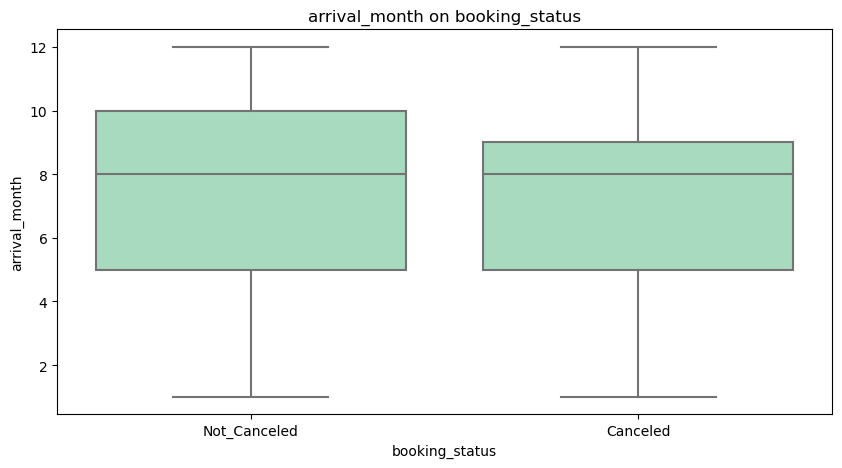

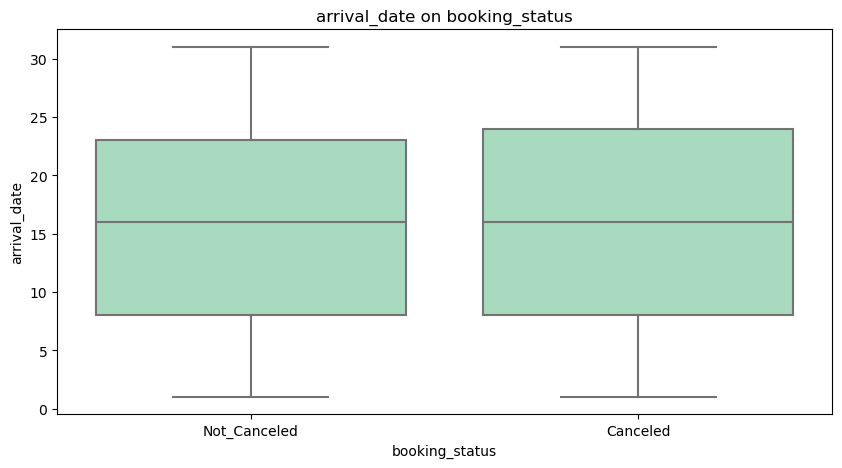

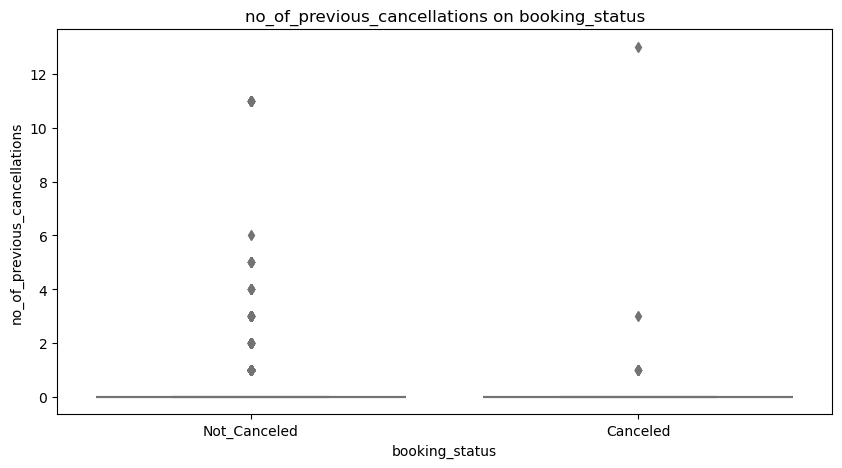

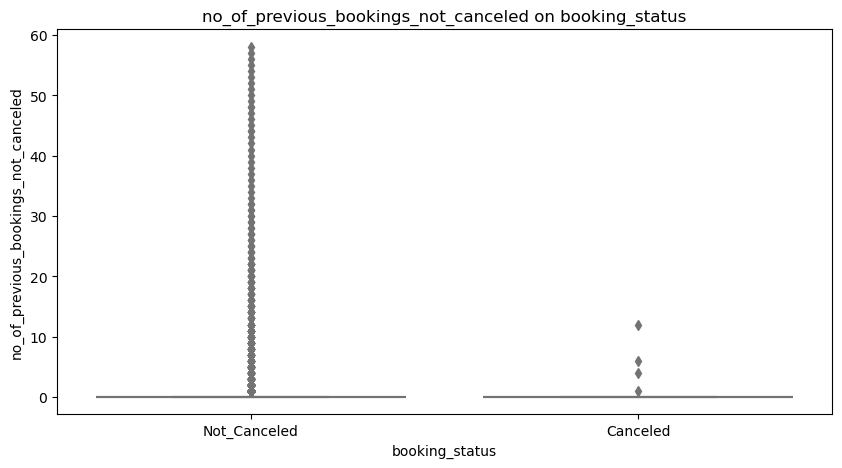

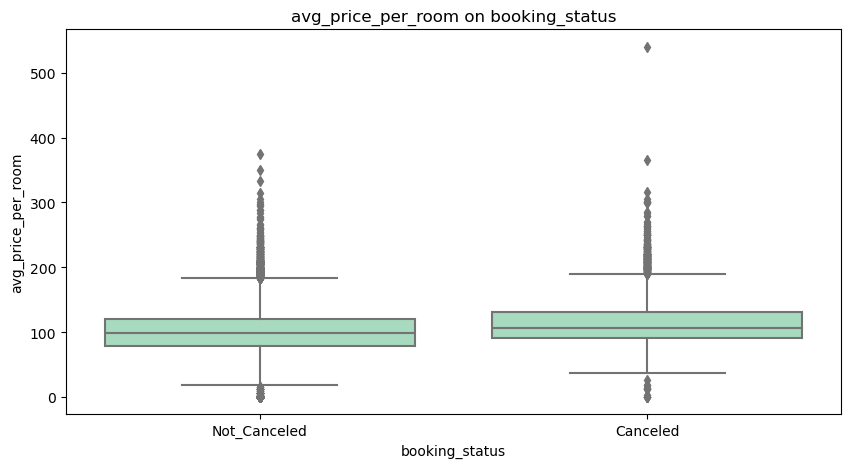

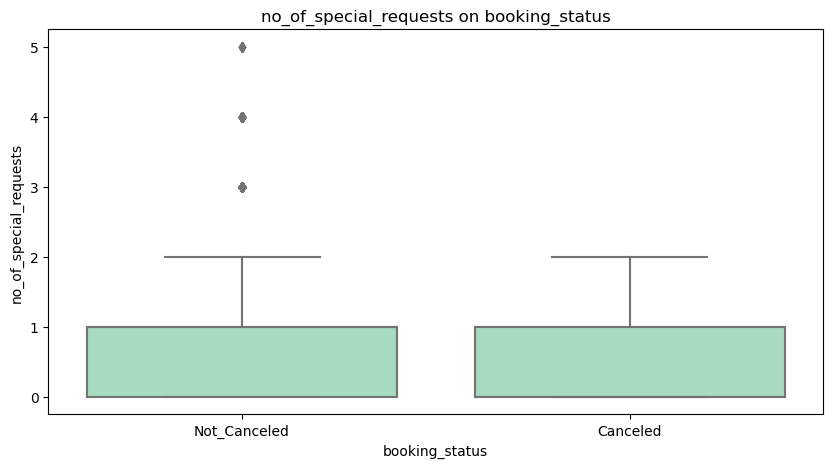

In [20]:
def num_with_y(data, cols, target):
    for c in cols:
        plt.figure(figsize = (10, 5))
    
        sns.boxplot(x = data[target],
                    y = data[c],
                    color = "#9FE2BF")
        plt.title(f"{c} on {target}")
        plt.show()

num_with_y(data,
           num,
           "booking_status")

> Berdasarkan *plot* di atas, diketahui bahwa rata-rata kolom *numerical* tidak berpengaruh secara signifikan terhadap **booking_status**, kecuali fitur **lead_time**, di mana pengunjung yang melakukan *cancellations* pada *booking*nya cenderung memiliki *lead time* yang lebih tinggi.

<Figure size 1000x500 with 0 Axes>

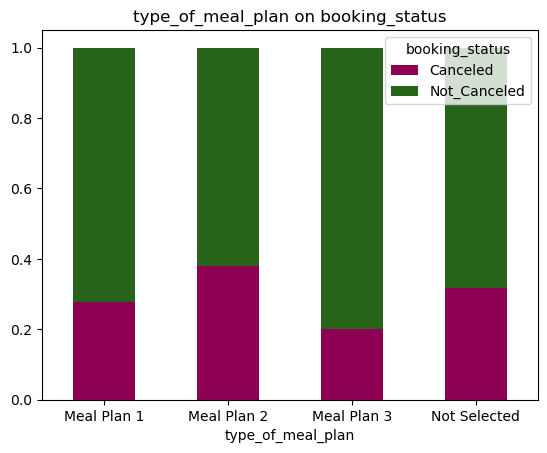

<Figure size 1000x500 with 0 Axes>

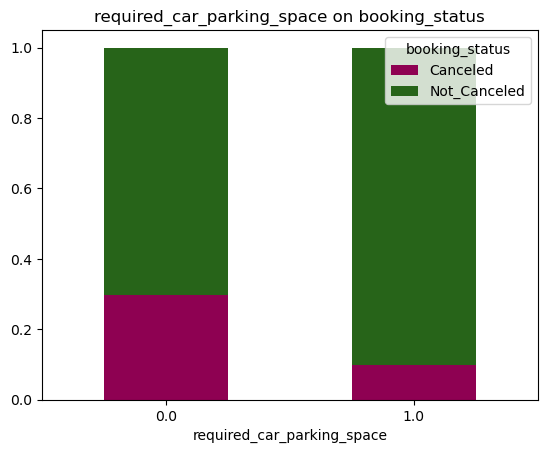

<Figure size 1000x500 with 0 Axes>

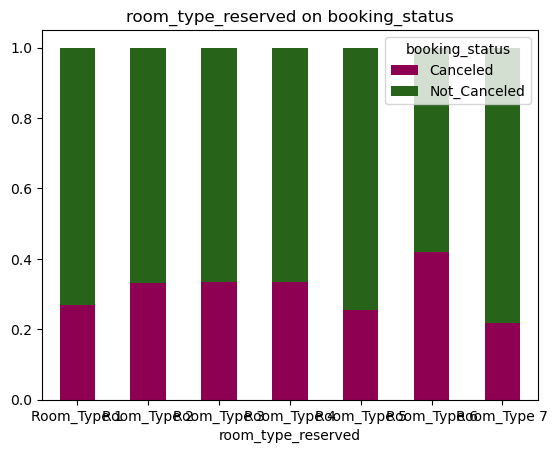

<Figure size 1000x500 with 0 Axes>

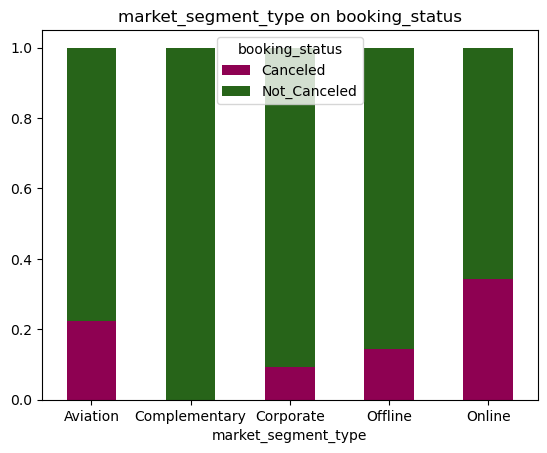

<Figure size 1000x500 with 0 Axes>

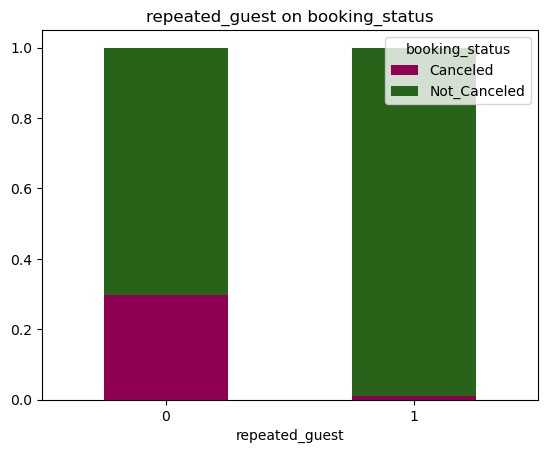

In [21]:
cat_wo_y = cat.copy()
cat_wo_y.remove("booking_status")
def cat_with_y(data, cols, target):
    for c in cols:
        plt.figure(figsize = (10, 5))
    
        data.groupby(c)[target].value_counts(normalize = True).unstack(target).plot.bar(stacked = True,
                                                                                        cmap = "PiYG")
        plt.title(f"{c} on {target}")
        plt.xticks(rotation = 0)
    
        plt.show()

cat_with_y(data,
           cat_wo_y,
           "booking_status")

> Berdasarkan hasil *correlation check* antara kolom *categorical* dengan variabel target, diketahui bahwa:
> - **market_segment_type**: Pengunjung yang berasal dari *complementary* atau tidak membayar karena alasan-alasan tertentu tidak melakukan *cancellations* pada pemesanan mereka.
> - **repeated_guest**: Pengunjung yang sudah pernah menginap di hotel sebelumnya cenderung tidak melakukan pembatalan pada pemesanan mereka.

In [22]:
bin_enc = {
    "booking_status": {
        "Not_Canceled": 0,
        "Canceled": 1
    }
}
data = data.replace(bin_enc)
print("Binary Encoding performed.")

Binary Encoding performed.


> Untuk mengetahui korelasi antara data *numerical* dengan **booking_status** secara umum, saya akan menampilkan *heatmap*, dan saya melakukan *mapping* (*binary encoding*) agar nilai **booking_status** dapat dibaca oleh *heatmap*.

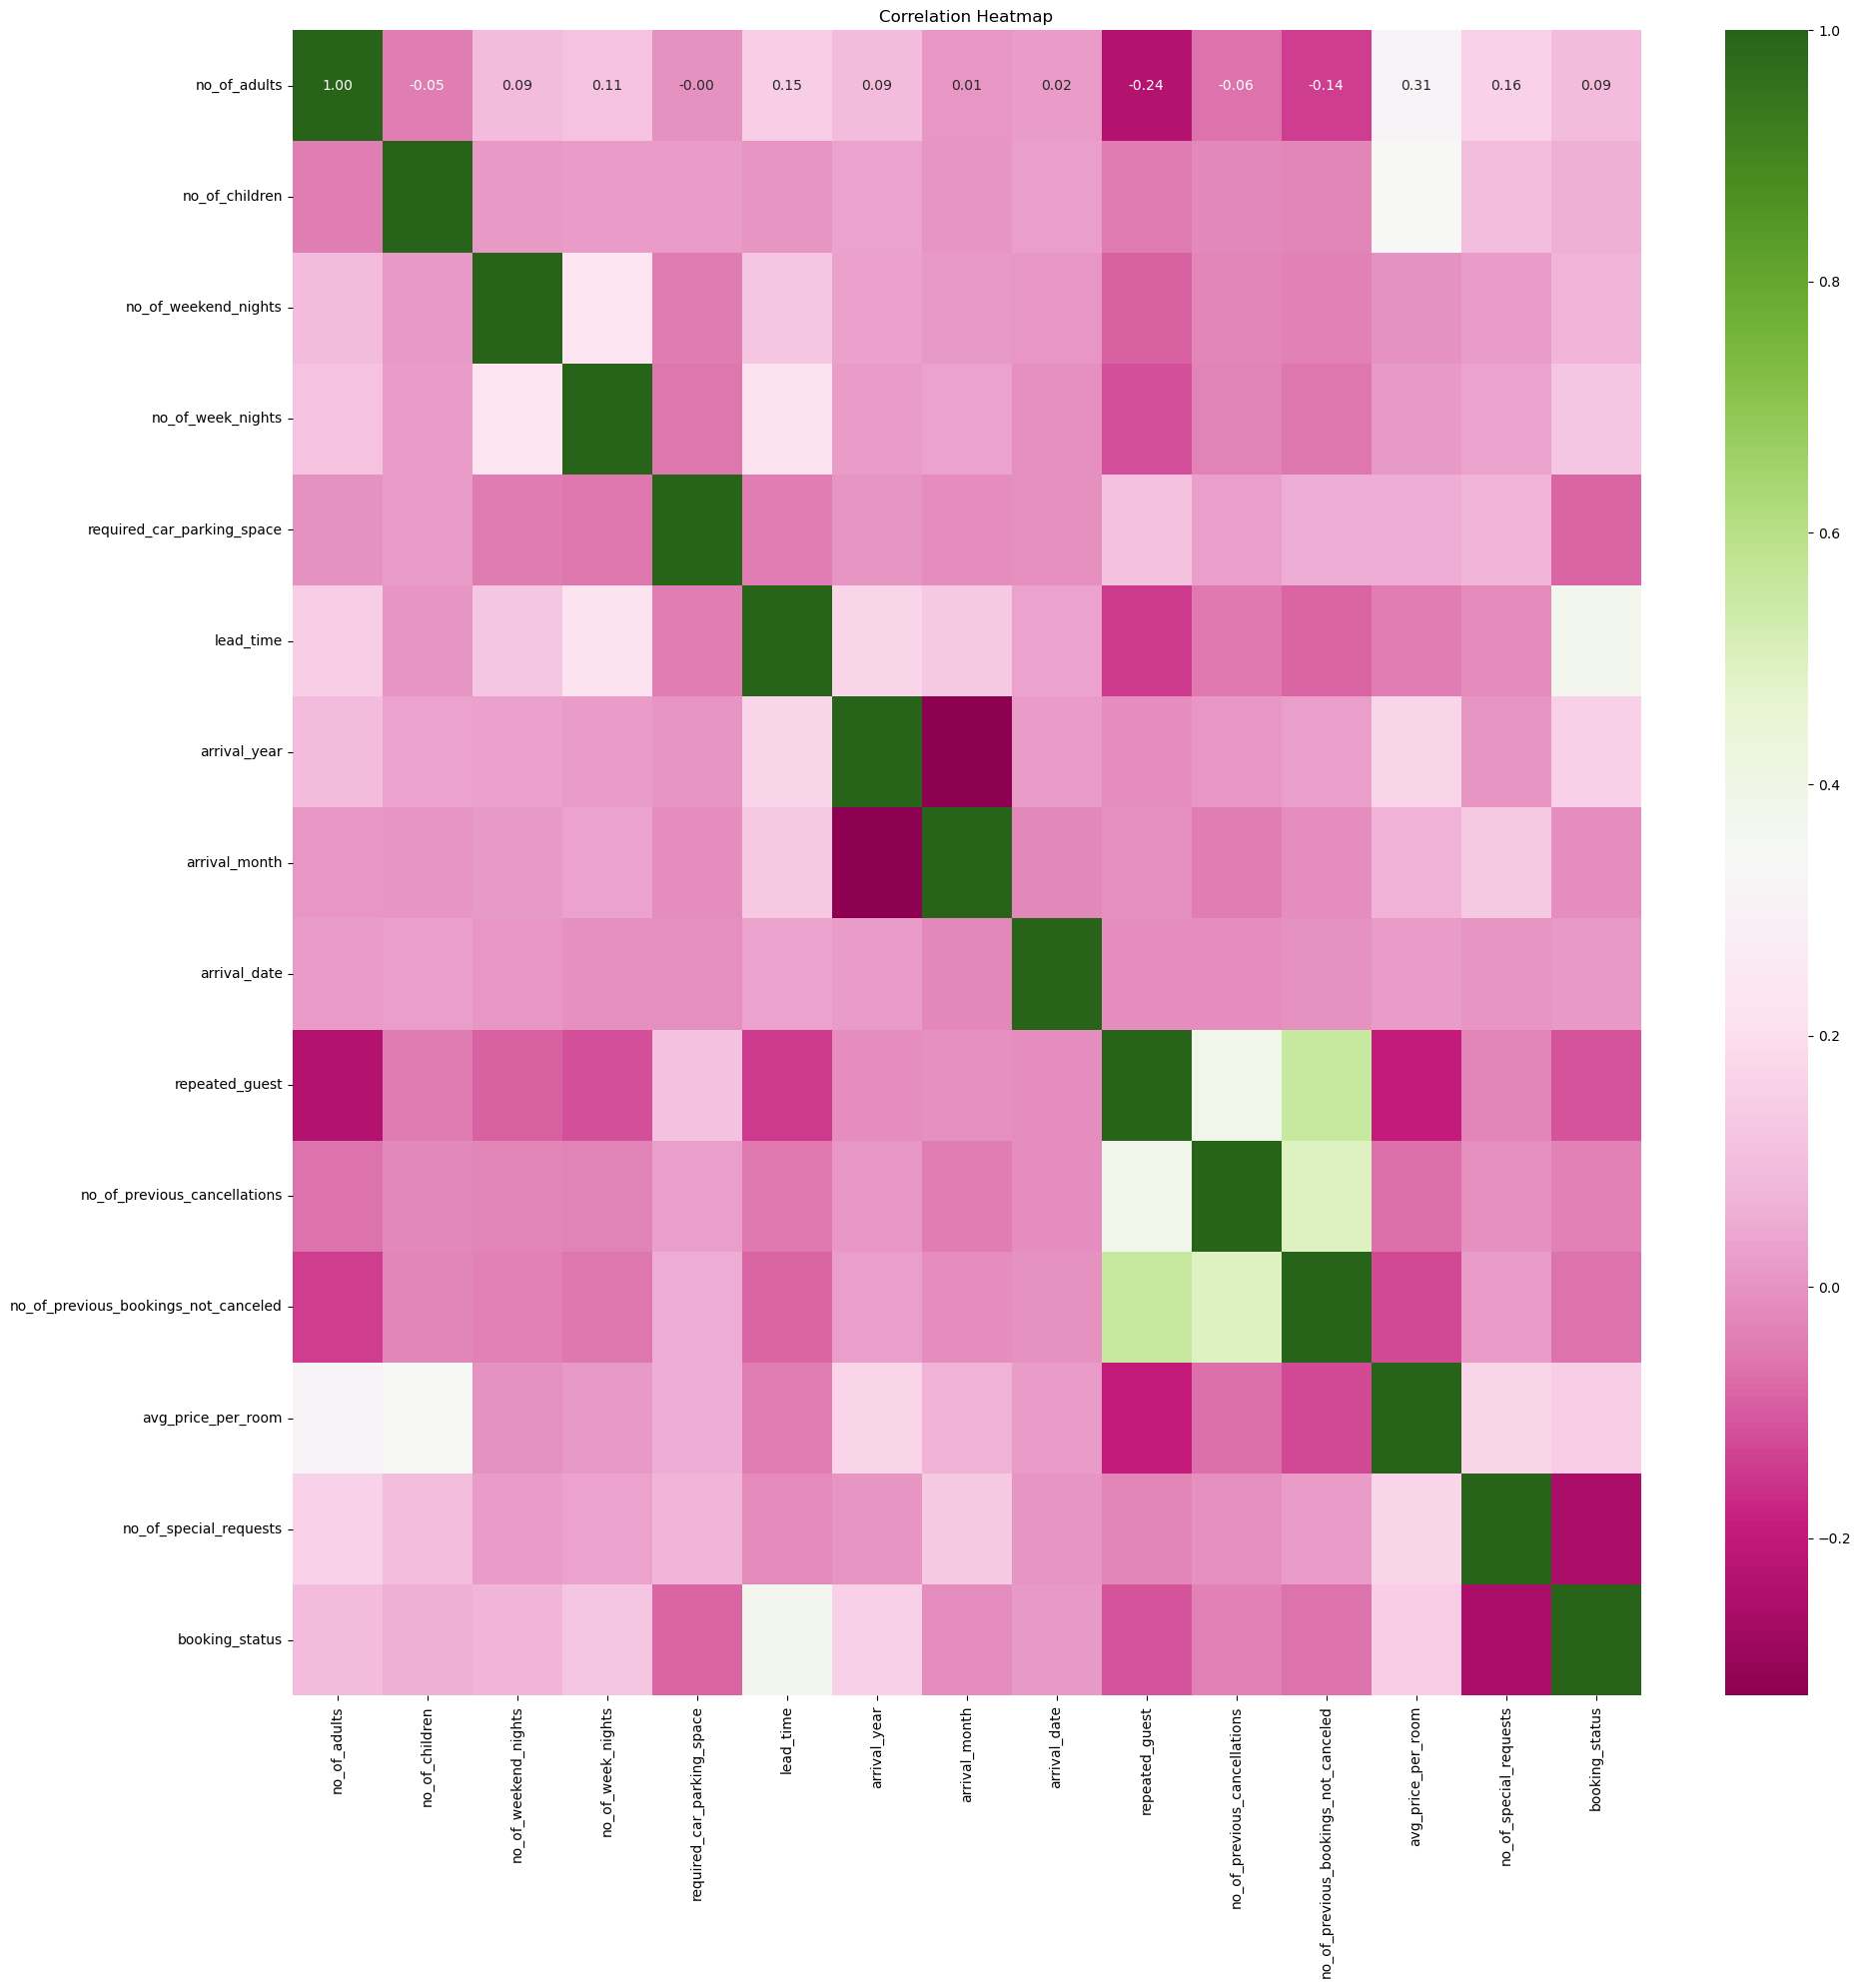

In [23]:
def heatmap(data):
    temp_data = data.select_dtypes(include = ["number"])
    plt.figure(figsize = (20, 20))
    sns.heatmap(temp_data.corr(),
                annot = True,
                cmap = "PiYG",
                fmt = ".2f",
                cbar = True)
    plt.title("Correlation Heatmap")
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

heatmap(data)

> Berdasarkan *heatmap* di atas, diketahui bahwa fitur **lead_time**, **avg_price_per_room**, dan **no_of_special_requests** memiliki korelasi yang paling tinggi dengan **booking_status**.  

### **ENCODING**

In [24]:
for c in cat:
    print(data[c].value_counts(),
          '\n')

type_of_meal_plan
Meal Plan 1     21393
Not Selected     4448
Meal Plan 2      1232
Meal Plan 3         5
Name: count, dtype: int64 

required_car_parking_space
0.0    26005
1.0     1073
Name: count, dtype: int64 

room_type_reserved
Room_Type 1    19583
Room_Type 4     5527
Room_Type 6      949
Room_Type 2      617
Room_Type 5      240
Room_Type 7      156
Room_Type 3        6
Name: count, dtype: int64 

market_segment_type
Online           20504
Offline           4636
Corporate         1477
Complementary      358
Aviation           103
Name: count, dtype: int64 

repeated_guest
0    26217
1      861
Name: count, dtype: int64 

booking_status
0    19244
1     7834
Name: count, dtype: int64 



> Berdasarkan *unique values check* di atas, diketahui bahwa:
> - **type_of_meal_plan**: Fitur ini dapat dianggap sebagai kolom *ordinal*, karena memiliki tingkatan, sehingga saya akan melakukan *encoding* dengan cara *ordinal*.
> - **required_car_parking_space**: Fitur ini sudah dalam bentuk angka, sehingga tidak diperlukan adanya *encoding*.
> - **room_type_reserved**: Fitur ini juga dapat dianggap sebagai kolom *ordinal*, karena memiliki tingkatan dari 1-7, sehingga saya akan melakukan *encoding* dengan cara *ordinal*.
> - **market_segment_type**: Fitur ini merupakan fitur yang tidak bertingkat, sehingga saya akan melakukan *encoding* dengan *OneHotEncoder*.
> - **repeated_guest**: Fitur ini sudah dalam bentuk angka, sehingga tidak diperlukan adanya *encoding*.
> - **booking_status**: Ini merupakan target variabel yang akan diprediksi, dan telah dilakukan *mapping* sebelumnya, sehingga tidak diperlukan adanya *encoding*.

In [25]:
ord_enc = {
    "type_of_meal_plan": {
        "Not Selected": 0,
        "Meal Plan 1": 1,
        "Meal Plan 2": 2,
        "Meal Plan 3": 3
    },
    "room_type_reserved": {
        "Room_Type 1": 1,
        "Room_Type 2": 2,
        "Room_Type 3": 3,
        "Room_Type 4": 4,
        "Room_Type 5": 5,
        "Room_Type 6": 6,
        "Room_Type 7": 7
    }
}
data = data.replace(ord_enc)
print("Ordinal Encoding performed.")

Ordinal Encoding performed.


In [26]:
ohe_cols = ["market_segment_type"]
ohe_enc = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")
data = pd.concat([data, 
                  ohe_enc.fit_transform(data[ohe_cols]).astype('int')], axis = 1)
data = data.drop(columns = ohe_cols)
print("One Hot Encoding performed.")

One Hot Encoding performed.


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27078 entries, 0 to 27077
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          27078 non-null  int64  
 1   no_of_children                        27078 non-null  int64  
 2   no_of_weekend_nights                  27078 non-null  int64  
 3   no_of_week_nights                     27078 non-null  int64  
 4   type_of_meal_plan                     27078 non-null  int64  
 5   required_car_parking_space            27078 non-null  float64
 6   room_type_reserved                    27078 non-null  int64  
 7   lead_time                             27078 non-null  int64  
 8   arrival_year                          27078 non-null  int64  
 9   arrival_month                         27078 non-null  int64  
 10  arrival_date                          27078 non-null  int64  
 11  repeated_guest 

In [28]:
check_unique_values(data)

Cardinality Check Result:


,column name,data type,unique values,values
0,no_of_adults,int64,5,"[2, 1, 3, 0, 4]"
1,no_of_children,int64,6,"[0, 2, 1, 3, 10, 9]"
2,no_of_weekend_nights,int64,8,"[1, 2, 0, 4, 3, 6, 5, 7]"
3,no_of_week_nights,int64,18,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,..."
4,type_of_meal_plan,int64,4,"[1, 0, 2, 3]"
5,required_car_parking_space,float64,2,"[0.0, 1.0]"
6,room_type_reserved,int64,7,"[1, 4, 2, 6, 5, 7, 3]"
7,lead_time,int64,352,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ..."
8,arrival_year,int64,2,"[2017, 2018]"
9,arrival_month,int64,12,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]"


> Berdasarkan *output* di atas, diketahui bahwa semua fitur telah di*encode*, sehingga dapat dibaca oleh model nantinya.

### **DATA SPLITTING**

In [29]:
x = data[data.columns.drop(["booking_status"])]
y = data["booking_status"]

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 11)

print("Data splitted.")

Data splitted.


> Pada *code* di atas, saya melakukan *splitting data* dengan proporsi data *train* dan *test* sebesar 70:30.

### **SCALING**

> Berdasarkan hasil pada [**DISTRIBUTION CHECK**](#DISTRIBUTION-CHECK) sebelumnya, diketahui bahwa baik *StandardScaler* maupun *MinMaxScaler* tidak *compatible* dengan data, karena data memiliki banyak *outlier* dan tidak terdistribusi secara normal, sehingga saya menggunakan *RobustScaler*, karena *scaling* ini lebih tidak sensitif terhadap *outlier*.

In [30]:
robust = RobustScaler()
x_train[num] = robust.fit_transform(x_train[num])
x_test[num] = robust.transform(x_test[num])
print("Scaling performed.")

Scaling performed.


### **MODELLING AND EVALUATION (BELOM INTERPRETASI)**

#### **RANDOM FOREST**

> Pada model yang pertama, saya melakukan *modelling* dengan menggunakan *Random Forest* dengan spesifikasi:
> - **n_estimators**: 100
> - **max_depth**: 11
> - **min_samples_split**: 5
> - **criterion**: gini

In [31]:
model_rf = RandomForestClassifier(n_estimators = 100,
                                  max_depth = 11,
                                  min_samples_split = 5,
                                  criterion = "gini",
                                  random_state = 11)

model_rf.fit(x_train,
             y_train)
ypred_rf = model_rf.predict(x_test)
print("Random Forest Model.")

Random Forest Model.


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      5756
           1       0.78      0.67      0.72      2368

    accuracy                           0.85      8124
   macro avg       0.83      0.80      0.81      8124
weighted avg       0.85      0.85      0.85      8124

      0     1
0  5320   436
1   785  1583


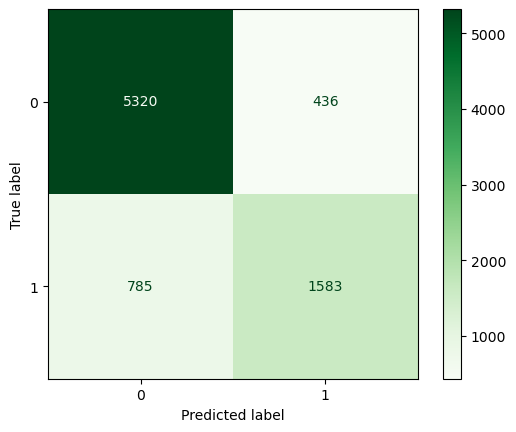

In [32]:
print(f"Classification Report:")
print(classification_report(y_test,
                            ypred_rf))
print(pd.DataFrame(confusion_matrix(y_test,
                                    ypred_rf)))
cm_rf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,
                                                                   ypred_rf),
                               display_labels = model_rf.classes_)
cm_rf.plot(cmap = "Greens")

> Berdasarkan *classification report* di atas, diketahui bahwa *accuracy* dari model *Random Forest* yang saya miliki adalah 85%, dengan *precision* sebesar 0.83, *recall* sebesar 0.80, dan *f1-score* sebesar 0.81.  
> Angka-angka ini mengindikasikan performa model yang terbilang cukup baik, yakni:  
> **Booking Status Not Cancelled:**  
> *Precision* sebesar 0.87 mengindikasikan bahwa 87% dari nilai yang diprediksi sebagai 0 (*Not Cancelled*) merupakan prediksi yang benar.  
> *Recall* sebesar 0.92 menunjukkan performa yang sangat baik, yakni dari seluruh data yang bernilai 0 (*Not Cancelled*), 92% di antaranya berhasil terprediksi dengan benar.  
> *F1-score* sebesar 0.90 menunjukkan kombinasi antara nilai *precision* dan *recall*.  
> Dengan ketiga nilai ini, dapat disimpulkan bahwa performa model di kelas 0 (*Not Cancelled*) sangat baik, karena *overall score*nya sebesar 0.90.  
> **Booking Status Cancelled:**  
> *Precision* sebesar 0.78 menunjukkan bahwa 78% dari nilai yang diprediksi sebagai 1 (*Cancelled*) merupakan prediksi yang benar.  
> *Recall* sebesar 0.67 mengindikasikan performa model yang kurang baik, yakni hanya 67% dari data yang bernilai 1 (*Cancelled*) diprediksi dengan benar.  
> Sebagai kombinasi kedua nilai di atas, didapatkan nilai *F1-score* sebesar 0.72.  
> Sehingga, performa model terhadap kelas 1 (*Cancelled*) lebih buruk dibandingkan performa model untuk kelas 0 (*Not Cancelled*).

> Secara umum, performa model dapat disimpulkan sebagai berikut:
> - *Precision* sebesar 0.83 mengindikasikan bahwa 83% dari nilai yang diprediksi merupakan nilai yang sesungguhnya (*true positive*).
> - *Recall* sebesar 0.80 menandakan bahwa sebanyak 80% dari data berhasil diprediksi dengan benar.
> - *F1-score* sebesar 0.81, menandakan keseluruhan performa model, yakni kombinasi antara *precision* dan *recall*.

> Kemudian, berdasarkan *confusion matrix* yang ada, diketahui rincian sebagai berikut:  
> **Booking Status Not Cancelled:**  
> ```TP   FP   TN   FN```  
> ```5320 785  1583 436 ```  
> **Booking Status Cancelled:**  
> ```TP   FP   TN   FN```  
> ```1583 436  5320 785 ```

> Dengan rincian di atas, diketahui bahwa performa model *Random Forest* dalam memprediksi nilai **booking_status** cukup baik, meski prediksinya cenderung lebih baik untuk kelas 0 dibandingkan kelas 1.

#### **XGBOOST**

> Pada model yang kedua, saya melakukan *modelling* dengan menggunakan *XGBoost* dengan spesifikasi:
> - **n_estimators**: 100
> - **learning_rate**: 0.9
> - **max_depth**: 10
> - **eval_metric**: logloss

In [33]:
model_xgb = XGBClassifier(n_estimators = 100,
                          learning_rate = 0.9,
                          max_depth = 10,
                          eval_metric = "logloss")

model_xgb.fit(x_train,
              y_train)
ypred_xgb = model_xgb.predict(x_test)
print("XGBoost Model.")

XGBoost Model.


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5756
           1       0.75      0.69      0.72      2368

    accuracy                           0.84      8124
   macro avg       0.81      0.80      0.80      8124
weighted avg       0.84      0.84      0.84      8124

      0     1
0  5210   546
1   745  1623


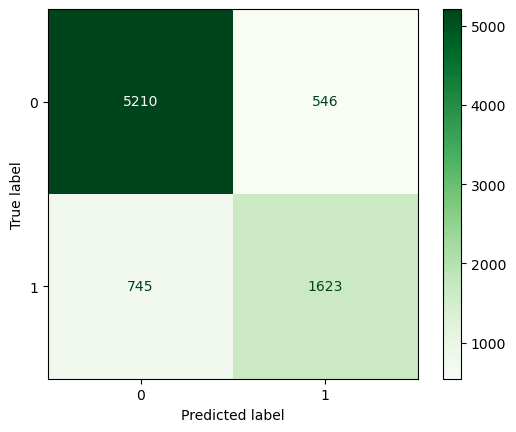

In [34]:
print(f"Classification Report:")
print(classification_report(y_test,
                            ypred_xgb))
print(pd.DataFrame(confusion_matrix(y_test,
                                    ypred_xgb)))
cm_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,
                                                                    ypred_xgb),
                               display_labels = model_xgb.classes_)
cm_xgb.plot(cmap = "Greens")

> Berdasarkan *classification report* di atas, diketahui bahwa *accuracy* dari model *XGBoost* yang saya miliki adalah 84%, dengan *precision* sebesar 0.81, *recall* sebesar 0.80, dan *f1-score* sebesar 0.80.  
> Angka-angka ini mengindikasikan performa model yang terbilang cukup baik, yakni:  
> **Booking Status Not Cancelled:**  
> *Precision* sebesar 0.87 mengindikasikan bahwa 87% dari nilai yang diprediksi sebagai 0 (*Not Cancelled*) merupakan prediksi yang benar.  
> *Recall* sebesar 0.91 menunjukkan performa yang sangat baik, yakni dari seluruh data yang bernilai 0 (*Not Cancelled*), 91% di antaranya berhasil terprediksi dengan benar.  
> *F1-score* sebesar 0.89 menunjukkan kombinasi antara nilai *precision* dan *recall*.  
> Dengan ketiga nilai ini, dapat disimpulkan bahwa performa model di kelas 0 (*Not Cancelled*) cukup baik, karena *overall score*nya sebesar 0.89.  
> **Booking Status Cancelled:**  
> *Precision* sebesar 0.75 menunjukkan bahwa 75% dari nilai yang diprediksi sebagai 1 (*Cancelled*) merupakan prediksi yang benar.  
> *Recall* sebesar 0.69 mengindikasikan performa model yang kurang baik, yakni hanya 69% dari data yang bernilai 1 (*Cancelled*) diprediksi dengan benar.  
> Sebagai kombinasi kedua nilai di atas, didapatkan nilai *F1-score* sebesar 0.72.  
> Sehingga, performa model terhadap kelas 1 (*Cancelled*) juga lebih buruk dibandingkan performa model untuk kelas 0 (*Not Cancelled*).

> Secara umum, performa model dapat disimpulkan sebagai berikut:
> - *Precision* sebesar 0.81 mengindikasikan bahwa 81% dari nilai yang diprediksi merupakan nilai yang sesungguhnya (*true positive*).
> - *Recall* sebesar 0.80 menandakan bahwa sebanyak 80% dari data berhasil diprediksi dengan benar.
> - *F1-score* sebesar 0.80, menandakan keseluruhan performa model, yakni kombinasi antara *precision* dan *recall*.

> Kemudian, berdasarkan *confusion matrix* yang ada, diketahui rincian sebagai berikut:  
> **Booking Status Not Cancelled:**  
> ```TP   FP   TN   FN```  
> ```5210 745  1623 546 ```  
> **Booking Status Cancelled:**  
> ```TP   FP   TN   FN```  
> ```1623 546  5210 745 ```

> Dengan rincian di atas, diketahui bahwa performa model *XGBoost* dalam memprediksi nilai **booking_status** cukup baik, meski prediksinya juga cenderung lebih baik untuk kelas 0 dibandingkan kelas 1, dan performa model ini tidak lebih baik dibandingkan dengan model *Random Forest*.

### **SUMMARY**

> Berdasarkan hasil evaluasi dari model *Random Forest* dan *XGBoost* di atas, didapatkan bahwa kedua model mampu memprediksi nilai **booking_status** dengan cukup baik, namun model *Random Forest* memiliki performa yang sedikit lebih baik.  
> Oleh karena itu, saya akan menggunakan model *Random Forst* untuk di-*deploy*.